## 1.Adaboost

In [10]:
import os
os.chdir('/content/LG_ML_tutorial/1. Adaptive boosting')

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: '/content/LG_ML_tutorial/1. Adaptive boosting'

#### (1) Importing packages

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

#### (2) Load dataset for implementation
###### - load PimaIndianDiabetes dataset and split

In [13]:
PimaIndiansDiabetes = pd.read_csv("PimaIndiansDiabetes.csv")

PimaIndiansDiabetes_X = PimaIndiansDiabetes.drop(columns=['diabetes'])
PimaIndiansDiabetes_Y = PimaIndiansDiabetes['diabetes']

n_train = 400

dia_train_X, dia_test_X, dia_train_Y, dia_test_Y = train_test_split(PimaIndiansDiabetes_X, PimaIndiansDiabetes_Y, train_size=n_train)

#### (3) Examples before initial settings

In [14]:
wgt = np.repeat(1/400, 400)

dia_rp = DecisionTreeClassifier(max_depth=30, min_samples_split=20)
dia_rp.fit(dia_train_X, dia_train_Y, sample_weight=wgt)

ci = dia_rp.predict(dia_train_X)

x = confusion_matrix(dia_train_Y, ci)
print("confusion matrix = \n", x)

x_bst = 1-np.diag(x).sum()/np.sum(x)
print("bst = ", 1-np.diag(x).sum()/np.sum(x))

confusion matrix = 
 [[243  20]
 [ 28 109]]
bst =  0.12


#### (4) Learning Adaboost

In [15]:
cit = np.array([])
ait = np.array([])
x_bst = np.array([])

iter = 20

for i in range(0,iter):
    dia_rp = DecisionTreeClassifier(max_depth=30, min_samples_split=20)
    dia_rp.fit(dia_train_X, dia_train_Y, sample_weight=wgt)

    ci = dia_rp.predict(dia_train_X)
    cit = np.append(cit, ci).reshape(i+1,-1)

    x = confusion_matrix(dia_train_Y, ci)
    x_bst = np.append(x_bst, 1-np.diag(x).sum()/np.sum(x))

    ai = 0.5 * np.log(wgt[ci == dia_train_Y].sum()/wgt[ci != dia_train_Y].sum())
    ait = np.append(ait, ai)

    zt = np.sum(wgt * np.exp(-ai * np.sign(1*np.array(ci == dia_train_Y)-0.5)))
    wgt = wgt * np.exp(-ai * np.sign(1*np.array(ci == dia_train_Y)-0.5)) / zt

    print("iteration ", i+1, " : ", x_bst[i], " ", ai)

iteration  1  :  0.12   0.996215082345103
iteration  2  :  0.22250000000000003   0.8540547199705648
iteration  3  :  0.15749999999999997   1.0907899800943515
iteration  4  :  0.1975   1.0293674048694228
iteration  5  :  0.21999999999999997   1.0883629723323969
iteration  6  :  0.22750000000000004   1.0660235963945677
iteration  7  :  0.23750000000000004   0.9865882777625117
iteration  8  :  0.2025   1.066616849747163
iteration  9  :  0.235   1.1610397424031886
iteration  10  :  0.1725   1.304319090707937
iteration  11  :  0.22999999999999998   1.0199114536087321
iteration  12  :  0.20750000000000002   1.1422982260430115
iteration  13  :  0.16749999999999998   1.3355085939265265
iteration  14  :  0.24   1.0877643666370722
iteration  15  :  0.22750000000000004   1.2867708578855297
iteration  16  :  0.235   1.2107660677518315
iteration  17  :  0.23750000000000004   1.1331287757385966
iteration  18  :  0.1975   1.1686811384633964
iteration  19  :  0.235   1.2644576637142184
iteration  20  

#### (5) Prediction of Adaboost

In [16]:
cit = np.sign(1*(cit == 'pos')-0.5)

In [17]:
pred = np.array([])
for i in range(0,iter):
    x = 0
    for j in range(0,i+1):
        x = x + ait[j]*cit[j,:]
    # print(x)
    pred = np.append(pred, x)

pred = np.sign(pred.reshape(iter,-1))

print(pred)

y_bst = np.array([])
dia_train_Y_tmp = np.sign(1*(dia_train_Y=='pos')-0.5)
for i in range(0,iter):
    x = confusion_matrix(dia_train_Y_tmp, pred[i,:])
    print(1-np.diag(x).sum()/np.sum(x))
    y_bst = np.append(y_bst, 1-np.diag(x).sum()/np.sum(x))


[[-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1.  1. -1.]
 ...
 [-1. -1.  1. ... -1.  1. -1.]
 [-1. -1.  1. ... -1.  1. -1.]
 [-1. -1.  1. ... -1.  1. -1.]]
0.12
0.12
0.03249999999999997
0.04749999999999999
0.0
0.0050000000000000044
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


### (6) Plotting

##### - Error from each boosting iterations

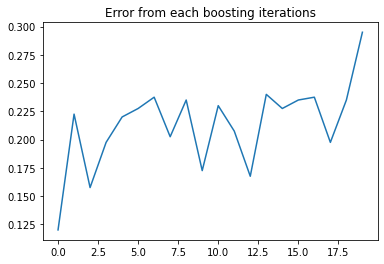

In [18]:
plt.plot(range(0,iter), x_bst)
plt.title('Error from each boosting iterations')
plt.show()

##### - Error arising from averaging predictions

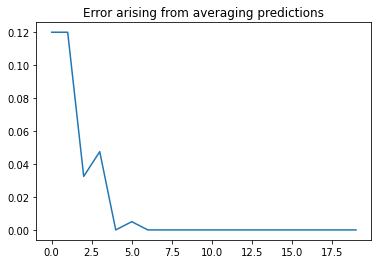

In [19]:
plt.plot(range(0,iter), y_bst)
plt.title("Error arising from averaging predictions")
plt.show()

### (7) Using sklearn.ensemble package

In [20]:
from sklearn.ensemble import AdaBoostClassifier

phishing = pd.read_csv("phishing.csv")

# Training Test sample split(7:3 = #train:#test)
#     return : train_X, test_X, train_Y, test_Y
#     function : train_test_split()
#     reference : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Mymodel = AdaBoostClassifier(n_estimators=50)

# Model fitting
#     return : fitted adaboost classifier named 'Mymodel'
#     function : Mymodel.fit()
#     reference : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html?highlight=adaboost#sklearn.ensemble.AdaBoostClassifier
#               : Methods 참조

# Prediction (train / test)
#     return : train / test prediction
#     function : Mymodel.predict()
#     reference : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html?highlight=adaboost#sklearn.ensemble.AdaBoostClassifier
#               : Methods 참조
#
#     return : confusion matrix for train / test prediction
#     function : confusion_matrix()
#     reference : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix
#
#     final result : train / test accuracy
